<a href="https://colab.research.google.com/github/Nikkiie/Covid-tweet-sentiment-analysis-Classification/blob/main/Covid_19_Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE - Sentiment Analysis : Predicting sentiment of COVID-19 tweets**

# **PROBLEM DESCRIPTION**

**This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.**

**The names and usernames have been given codes to avoid any privacy concerns.**

**The features present in the data are --**



1- Username

2- ScreenName

3- Location

4- TweetAt

5- OriginalTweet

6- Sentiment

# **IMPORTING LIBRARIES**

In [1]:
# Importing Libraries
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')


from scipy import stats 
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import make_scorer,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import f1_score

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# Importing libraries for text-preprocessing and NLP

# **Loading the dataset**

In [2]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Giving the file path

file_path = ('/content/drive/MyDrive/Cap-3/Coronavirus Tweets.csv')
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

**Dataset First view**

In [6]:
# Checking top 5 rows in dataframe
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
# Checking last 5 rows in dataframe
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


**Dataset Rows & Columns count**

In [8]:
# Data shape
df.shape

(41157, 6)

In [9]:
#Check all the coloumns present in our dataset
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

**Dataset Information**

In [10]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


**Duplicate Values**

In [11]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


**Checking Unique Value**

In [12]:
# Looking for unique values in columns of dataset
for i in df.columns:
  print("Total Unique Values in", i, "-", len(df[i].unique()))

Total Unique Values in UserName - 41157
Total Unique Values in ScreenName - 41157
Total Unique Values in Location - 12221
Total Unique Values in TweetAt - 30
Total Unique Values in OriginalTweet - 41157
Total Unique Values in Sentiment - 5


# **Null Value Analysis-**

In [ ]:
# Installing missingno
pip install missingno

In [16]:
# Importing missingo
import missingno as msno

In [13]:
# Checking null value
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [14]:
# 1-step make the list of features which has missing values
feature_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>1]
# 2-step print the feature name and the percentage of missing values
for feature in feature_with_na:
  print(feature, np.round(df[feature].isnull().mean(), 4)*100,  " % missing values")

Location 20.87  % missing values


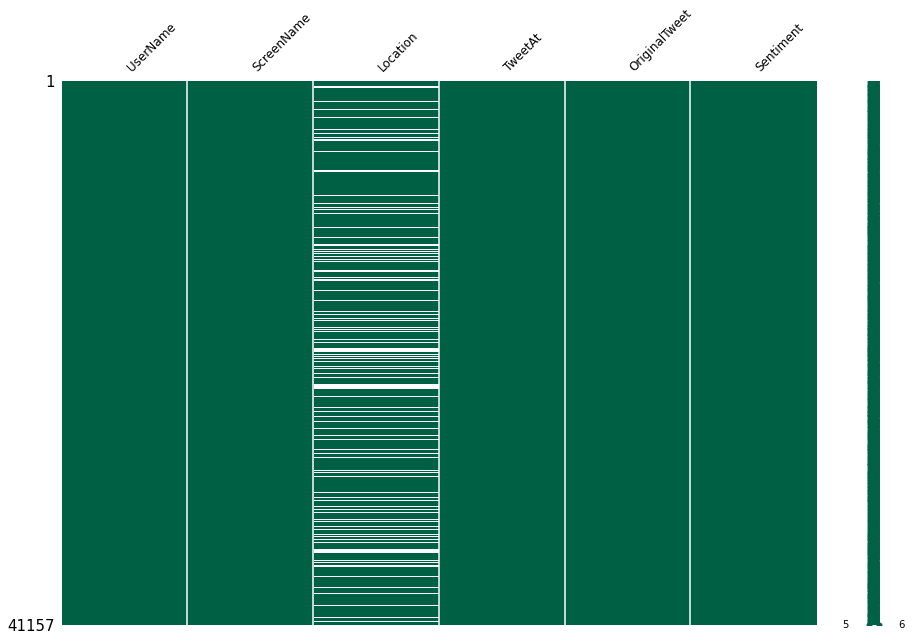

In [21]:
msno.matrix(df, figsize=(15,10), fontsize=12, color=(0, 0.38, 0.27));